In [529]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [661]:
df=pd.read_csv("../examples/test-output/static-full.dat",skiprows=2)

df.columns=df.columns.str.strip()

In [662]:
df.tail()

,Time,Density,gasTemp,av,point,H,#H,H+,@H,H2,...,HS2,HS2+,HSO2+,H2S2+,H2S2,#H2S2,@H2S2,BULK,SURFACE,E-
99,96100.0,10000.0,10.0,2.9644,1,0.023955,4.203650e-14,3.515300e-11,4.314610e-27,0.487926,...,6.427970e-13,4.370970e-14,9.755740e-18,4.205110e-17,4.921500e-13,3.826110e-14,3.927100e-27,5.112990e-19,0.000002,0.000007
100,97100.0,10000.0,10.0,2.9644,1,0.023211,4.136460e-14,3.452840e-11,4.420030e-27,0.488297,...,6.505960e-13,4.371700e-14,1.020150e-17,4.259460e-17,4.953230e-13,4.146530e-14,4.430800e-27,5.323000e-19,0.000002,0.000007
101,98100.0,10000.0,10.0,2.9644,1,0.022491,4.070300e-14,3.392800e-11,4.553310e-27,0.488657,...,6.582750e-13,4.371760e-14,1.067000e-17,4.311710e-17,4.984000e-13,4.499100e-14,5.032990e-27,5.572620e-19,0.000002,0.000007
102,99100.0,10000.0,10.0,2.9644,1,0.021794,4.005160e-14,3.335110e-11,4.717310e-27,0.489006,...,6.658050e-13,4.371100e-14,1.116230e-17,4.361510e-17,5.013610e-13,4.887030e-14,5.756000e-27,5.867220e-19,0.000003,0.000007
103,100100.0,10000.0,10.0,2.9644,1,0.021118,3.941020e-14,3.279730e-11,4.931790e-27,0.489344,...,6.731560e-13,4.369660e-14,1.167970e-17,4.408480e-17,5.041880e-13,5.313710e-14,6.649590e-27,6.233800e-19,0.000003,0.000007


In [663]:
def ice_total(species):
    return df[f"#{species}"].values+df[f"@{species}"].values

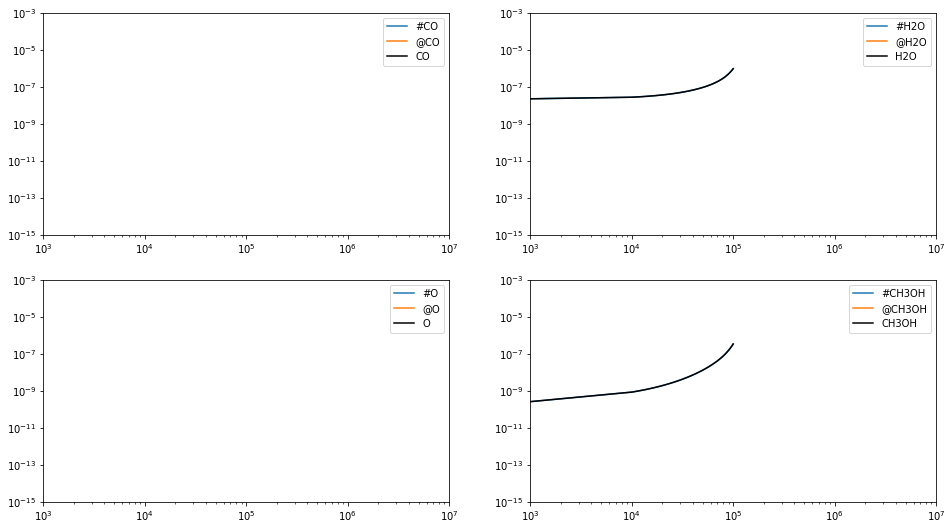

In [664]:
fgi,axes=plt.subplots(2,2,figsize=(16,9))
species=["CO","H2O","O","CH3OH"]
for i,ax in enumerate(axes.flatten()):
    spec=species[i]
    ax.plot(df["Time"],df[f"#{spec}"],label=f"#{spec}")
    ax.plot(df["Time"],df[f"@{spec}"],label=f"@{spec}")
    ax.plot(df["Time"],ice_total(spec),label=f"{spec}",color="black")
    ax.plot()
    ax.set(yscale="log",ylim=(1e-15,1e-3),xscale="log",xlim=(1e3,1e7))
    ax.legend()

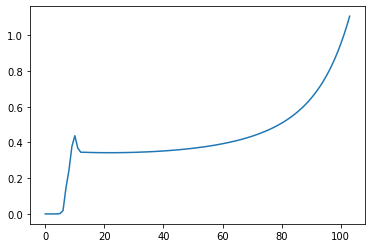

In [665]:
sites_per_grain=1884955.6446075444
gas_to_dust=756764614951.04846

surface_per_grain=df["SURFACE"]*gas_to_dust
surface_layers=surface_per_grain/sites_per_grain

plt.plot(surface_layers)